# Decision Tree carbon and silicon isotopes

In [1]:
#Imports
import joblib
import pandas as pd

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

## Read the CSV file

In [2]:
# Read the csv and create a dataframe
carbon_silicon = pd.read_csv('presolargrains_C_Si2.csv')
carbon_silicon.head()

,Type,carbon_isotopes,silicon_29_28,silicon_30_28
0,C,1.300,313.0,377.0
1,AB,1.420,-59.0,19.0
2,AB,1.854,8.0,56.0
3,AB,1.880,20.0,33.0
4,AB,1.910,9.0,103.0


## Set up target

In [3]:
# Set up the target column and the target names
target = carbon_silicon["Type"]
target_names = ["AB", "C", "M", "N", "U", "X", "Y", "Z"]

## Set up data and feature names

In [4]:
# Set up data and feature names; display dataframe after Type is dropped
data = carbon_silicon.drop("Type", axis=1)
feature_names = data.columns
data.head()

,carbon_isotopes,silicon_29_28,silicon_30_28
0,1.300,313.0,377.0
1,1.420,-59.0,19.0
2,1.854,8.0,56.0
3,1.880,20.0,33.0
4,1.910,9.0,103.0


## Create Train Test Split

In [5]:
# Separate data into train and test buckets
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=1)

## Scale the data using MinMaxScalar

In [6]:
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Train the model; Run the test score

In [7]:
# Decision Tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train_scaled, y_train)
clf.score(X_test_scaled, y_test)

0.9509151414309485

## Graph the decision tree

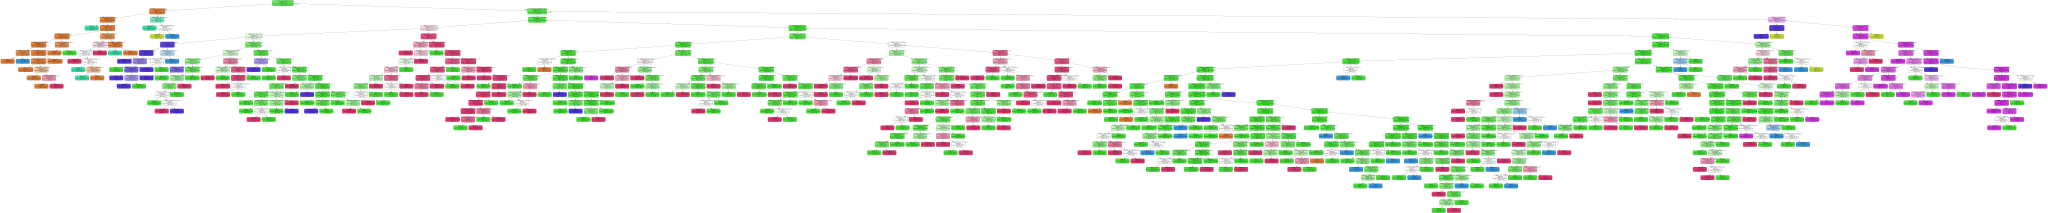

In [8]:
# Graph the Decision Tree (scroll down and to the right until the boxes appear below)
import graphviz 
dot_data = tree.export_graphviz(
    clf, out_file=None, 
    feature_names=feature_names,  
    class_names=target_names,  
    filled=True, rounded=True,  
    special_characters=True)  

import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('meteorite_carbon_silicon.png')

graph = graphviz.Source(dot_data)  
graph 

# See the Summary below the graphed tree.

## Save the model

In [9]:
# Save model to file
filename = 'DecisionTree_C_Si.sav'
joblib.dump(clf, filename)

['DecisionTree_C_Si.sav']

## Summary: 

### Decision Tree carbon silicon: 95.1%